Cel: 
1. Wystandaryzować kierunki zmiennych porządkowych tak by większa liczba oznaczała wzrost natężenia
2. Zmapować zmiennym nominalnym odpowiednie wartości string zamiast kodów liczbowych, dla jasności
3. Dychotomizacja zmiennych porządkowych na bazie mediany wartości: 1 gdy > mediana
4. Dychotimizacja z naciskiem na wartości skrajne
5. Ograniczyć zmienną 'źródło dochodów' do 2/3 wartości

Import bibliotek

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_source = r"I:\Mój dysk\Licencjat\Dane\ESS11-32 vars\ESS11-subset.csv"
df = pd.read_csv(data_source)

dweight (Design weight) – waga projektowa, która koryguje różnice w prawdopodobieństwie wylosowania respondentów wynikające z zastosowanej metody doboru próby (np. jeśli w niektórych krajach stosowano losowanie warstwowe, a w innych losowanie proste).

pspwght (Post-stratification weight including design weight) – waga post-stratyfikacyjna, uwzględniająca w sobie wagę projektową (dweight), ale dodatkowo dostosowująca próbę tak, aby lepiej odzwierciedlała rozkład populacji w danym kraju według kluczowych zmiennych (np. płci, wieku, wykształcenia).

pweight (Population size weight) – waga wielkości populacji, stosowana w analizach porównawczych między krajami. Pozwala uwzględnić różnice w liczbie ludności między krajami (np. próba z małego kraju nie powinna mieć takiej samej wagi jak z dużego kraju). Musi być stosowana razem z dweight lub pspwght.

anweight (Analysis weight) – waga analityczna, która jest iloczynem pweight i pspwght. Stosowana do analiz porównawczych uwzględniających zarówno wielkość populacji, jak i post-stratyfikację.

In [3]:
#Usunięcie zbędnych kolumn
df = df.iloc[:,5:-3] 
df_anweight = df['anweight'].copy()
df = df.drop(columns = ['dweight','pspwght','pweight'])

In [4]:
# Lista wartości oznaczających braki danych
missing_values = [77, 88, 99, 666, 777, 888, 999, 6666, 7777, 8888, 9999]
# Zamiana wartości brakujących na NaN
df.replace(missing_values, np.nan, inplace=True)

In [5]:
opis_zmiennych = [
    {"Kod zmiennej": "cntry", "Opis": "Kraj respondenta", "Zakres wartości": "Kod kraju (np. AL, AT, BE, BG, CH, itd.)", "Wartości brakujące": "Brak"},
    {"Kod zmiennej": "nwspol", "Opis": "Czas śledzenia wiadomości o polityce (minuty)", "Zakres wartości": "0-1440", "Wartości brakujące": "7777, 8888, 9999"},
    {"Kod zmiennej": "netustm", "Opis": "Czas spędzony w Internecie (minuty)", "Zakres wartości": "0-1440", "Wartości brakujące": "6666, 7777, 8888, 9999"},
    {"Kod zmiennej": "lrscale", "Opis": "Samoocena na skali lewica-prawica", "Zakres wartości": "0 (lewica) - 10 (prawica)", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "happy", "Opis": "Jak bardzo szczęśliwy/a jesteś?", "Zakres wartości": "0 (bardzo nieszczęśliwy) - 10 (bardzo szczęśliwy)", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "sclmeet", "Opis": "Jak często spotykasz się towarzysko?", "Zakres wartości": "1 (nigdy) - 7 (codziennie)", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "inprdsc", "Opis": "Liczba osób do rozmów osobistych", "Zakres wartości": "0 (brak) - 6 (10+ osób)", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "health", "Opis": "Subiektywna ocena zdrowia", "Zakres wartości": "1 (bardzo dobre) - 5 (bardzo złe)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "rlgblg", "Opis": "Czy przynależysz do religii/wyznania?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "rlgdgr", "Opis": "Jak religijny/a się czujesz?", "Zakres wartości": "0 (wcale) - 10 (bardzo religijny)", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "ctzcntr", "Opis": "Czy jesteś obywatelem kraju?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "brncntr", "Opis": "Czy urodziłeś/aś się w kraju?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "feethngr", "Opis": "Czy czujesz się częścią grupy etnicznej?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "facntr", "Opis": "Czy ojciec urodził się w kraju?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "mocntr", "Opis": "Czy matka urodziła się w kraju?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "wrclmch", "Opis": "Jak bardzo martwisz się zmianami klimatu?", "Zakres wartości": "1 (wcale) - 5 (bardzo mocno)", "Wartości brakujące": "6, 7, 8, 9"},
    {"Kod zmiennej": "gndr", "Opis": "Płeć respondenta", "Zakres wartości": "1 (mężczyzna), 2 (kobieta)", "Wartości brakujące": "9"},
    {"Kod zmiennej": "dvrcdeva", "Opis": "Czy kiedykolwiek się rozwiodłeś/aś?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "7, 8, 9"},
    {"Kod zmiennej": "chldhhe", "Opis": "Czy miałeś/aś dzieci w gospodarstwie domowym?", "Zakres wartości": "1 (tak), 2 (nie)", "Wartości brakujące": "6, 7, 8, 9"},
    {"Kod zmiennej": "eisced", "Opis": "Najwyższy poziom wykształcenia", "Zakres wartości": "0-7 (ISCED)", "Wartości brakujące": "55, 77, 88, 99"},
    {"Kod zmiennej": "eduyrs", "Opis": "Liczba lat edukacji", "Zakres wartości": "0 - maksymalna liczba lat", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "wkhtot", "Opis": "Liczba godzin pracy w tygodniu", "Zakres wartości": "0-168", "Wartości brakujące": "666, 777, 888, 999"},
    {"Kod zmiennej": "hincsrca", "Opis": "Główne źródło dochodu gospodarstwa", "Zakres wartości": "1-8 (np. pensja, emerytura, zasiłek)", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "eiscedp", "Opis": "Najwyższy poziom wykształcenia partnera", "Zakres wartości": "0-7 (ISCED)", "Wartości brakujące": "66, 77, 88, 99"},
    {"Kod zmiennej": "eiscedf", "Opis": "Najwyższy poziom wykształcenia ojca", "Zakres wartości": "0-7 (ISCED)", "Wartości brakujące": "77, 88, 99"},
    {"Kod zmiennej": "eiscedm", "Opis": "Najwyższy poziom wykształcenia matki", "Zakres wartości": "0-7 (ISCED)", "Wartości brakujące": "77, 88, 99"},
]
tabela_opisu_zmiennych = pd.DataFrame(opis_zmiennych)

In [6]:
(nominalne,
porządkowe,
ilościowe) = (['cntry', 'rlgblg', 'ctzcntr','brncntr','feethngr','facntr', 'mocntr','gndr','dvrcdeva','chldhhe','hincsrca'],
              ['lrscale','happy','sclmeet', 'inprdsc','health', 'rlgdgr','wrclmch', 'eisced','eiscedp', 'eiscedf', 'eiscedm'],
              ['nwspol','netustm','eduyrs','wkhtot'])

In [7]:
# Indeksy kolumn z wartościami oznaczającymi braki
selected_columns_missing_values_789 = [7, 8, 10, 11, 12, 13, 14, 17]
selected_columns_missing_values_6789 = [15, 18]
selected_columns_missing_values_9 = [16]

# Mapowanie wartości brakujących
missing_values_map = {
    tuple(selected_columns_missing_values_789): [7, 8, 9],
    tuple(selected_columns_missing_values_6789): [6, 7, 8, 9],
    tuple(selected_columns_missing_values_9): [9]
}

# Iteracja po słowniku i zamiana wartości na NaN
for cols, missing_values in missing_values_map.items():
    df.iloc[:, list(cols)] = df.iloc[:, list(cols)].replace(missing_values, np.nan)
df.loc[:, ['eisced', 'eiscedp','eiscedf','eiscedm']] = df.loc[:, ['eisced', 'eiscedp','eiscedf','eiscedm']].replace([0,55,66,77,88,99], np.nan)

C:\Users\Michau\AppData\Local\Temp\ipykernel_3384\3080177736.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        3.0
1        2.0
2        1.0
3        3.0
4        2.0
        ... 
40151    2.0
40152    2.0
40153    2.0
40154    1.0
40155    2.0
Name: health, Length: 40156, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, list(cols)] = df.iloc[:, list(cols)].replace(missing_values, np.nan)
C:\Users\Michau\AppData\Local\Temp\ipykernel_3384\3080177736.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        1.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
40151    1.0
40152    1.0
40153    1.0
40154    1.0
40155    1.0
Name: ctzcntr, Length: 40156, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype fi

In [8]:
#Podstawowy przegląd zmiennych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cntry     40156 non-null  object 
 1   anweight  40156 non-null  float64
 2   nwspol    39669 non-null  float64
 3   netustm   31397 non-null  float64
 4   lrscale   35230 non-null  float64
 5   happy     40024 non-null  float64
 6   sclmeet   40081 non-null  float64
 7   inprdsc   39939 non-null  float64
 8   health    40103 non-null  float64
 9   rlgblg    40156 non-null  int64  
 10  rlgdgr    28797 non-null  float64
 11  ctzcntr   40120 non-null  float64
 12  brncntr   40134 non-null  float64
 13  feethngr  39765 non-null  float64
 14  facntr    40011 non-null  float64
 15  mocntr    40090 non-null  float64
 16  wrclmch   40136 non-null  float64
 17  gndr      40156 non-null  int64  
 18  dvrcdeva  39954 non-null  float64
 19  chldhhe   40156 non-null  int64  
 20  eisced    39889 non-null  fl

In [9]:
df.iloc[:,:14].describe(),df.iloc[:,14:].describe()

(           anweight        nwspol       netustm       lrscale         happy  \
 count  40156.000000  39669.000000  31397.000000  35230.000000  40024.000000   
 mean       1.037716     98.221004    236.736089      5.027250      7.488282   
 std        1.471417    165.896782    187.727266      2.244828      1.790229   
 min        0.007555      0.000000      0.000000      0.000000      0.000000   
 25%        0.212257     30.000000    120.000000      4.000000      7.000000   
 50%        0.476533     60.000000    180.000000      5.000000      8.000000   
 75%        1.442220    105.000000    300.000000      6.000000      9.000000   
 max       12.997417   1439.000000   1440.000000     10.000000     10.000000   
 
             sclmeet       inprdsc        health        rlgblg        rlgdgr  \
 count  40081.000000  39939.000000  40103.000000  40156.000000  28797.000000   
 mean       4.792545      2.803500      2.146573      1.407610      3.663055   
 std        1.574799      1.421576    

In [10]:
# Wczytanie informacji o zmiennych porządkowych
tabela_opisu_zmiennych[tabela_opisu_zmiennych['Kod zmiennej'].isin(df[porządkowe].columns)]

,Kod zmiennej,Opis,Zakres wartości,Wartości brakujące
3,lrscale,Samoocena na skali lewica-prawica,0 (lewica) - 10 (prawica),"77, 88, 99"
4,happy,Jak bardzo szczęśliwy/a jesteś?,0 (bardzo nieszczęśliwy) - 10 (bardzo szczęśliwy),"77, 88, 99"
5,sclmeet,Jak często spotykasz się towarzysko?,1 (nigdy) - 7 (codziennie),"77, 88, 99"
6,inprdsc,Liczba osób do rozmów osobistych,0 (brak) - 6 (10+ osób),"77, 88, 99"
7,health,Subiektywna ocena zdrowia,1 (bardzo dobre) - 5 (bardzo złe),"7, 8, 9"
9,rlgdgr,Jak religijny/a się czujesz?,0 (wcale) - 10 (bardzo religijny),"77, 88, 99"
15,wrclmch,Jak bardzo martwisz się zmianami klimatu?,1 (wcale) - 5 (bardzo mocno),"6, 7, 8, 9"
19,eisced,Najwyższy poziom wykształcenia,0-7 (ISCED),"55, 77, 88, 99"
23,eiscedp,Najwyższy poziom wykształcenia partnera,0-7 (ISCED),"66, 77, 88, 99"
24,eiscedf,Najwyższy poziom wykształcenia ojca,0-7 (ISCED),"77, 88, 99"


In [11]:
#Zmapowanie zmiennych nominalnych
#1 = yes, 0 = no
df[['rlgblg', 'ctzcntr', 'brncntr', 'feethngr', 'facntr', 'mocntr','dvrcdeva', 'chldhhe']] = df[
['rlgblg', 'ctzcntr', 'brncntr', 'feethngr', 'facntr', 'mocntr','dvrcdeva', 'chldhhe']].replace(2, 0)
df['gndr'] = df['gndr'].replace({1:"M",2:"F"})
df['hincsrca'] = df['hincsrca'].replace({
    1: "Wage/salary",
    2: "Self-employment",
    3: "Farming",
    4: "Pensions",
    5: "Unemployment/redundancy benefit",
    6: "Any other social benefits or grants",
    7: "Income from investments, savings etc.",
    8: "Income from other sources"
})
df['professional_activity'] = df['hincsrca'].apply(lambda x: 1 if x in ["Wage/salary", "Self-employment", "Farming"] else 0)

# Porządkowe:
#ujednolicenie kierunku wzrostu natężenia - odwrócenie skali zmiennej health
df['health'] = 6 - df['health']

In [12]:
def frequency_table(series: pd.Series) -> pd.DataFrame:
    """
    Tworzy tabelę częstości dla podanej serii Pandas, zawierającą:
    - Liczbę wystąpień (Frequency)
    - Procentowy udział wartości (Percentage)
    - Skumulowany procent wartości (Cumulative Percentage)
    Parametry:
    series (pd.Series): Kolumna Pandas, dla której obliczamy tabelę częstości.
    Zwraca:
    pd.DataFrame: Tabela z częstościami i procentami skumulowanymi.
    """
    freq_table = series.value_counts().sort_index()
    percent_table = (freq_table / freq_table.sum()) * 100
    cumulative_percent = percent_table.cumsum()
    result = pd.DataFrame({
        'Frequency': freq_table,
        'Percentage': percent_table,
        'Cumulative Percentage': cumulative_percent
    })
    return result

In [13]:
for var in list(df[porządkowe+ilościowe]):
    print(frequency_table(df[var]),end = "\n\n===================================\n\n")

         Frequency  Percentage  Cumulative Percentage
lrscale                                              
0.0           1398    3.968209               3.968209
1.0            857    2.432586               6.400795
2.0           2223    6.309963              12.710758
3.0           3824   10.854385              23.565143
4.0           3577   10.153278              33.718422
5.0          11217   31.839341              65.557763
6.0           3446    9.781436              75.339200
7.0           3721   10.562021              85.901221
8.0           2783    7.899517              93.800738
9.0            885    2.512064              96.312802
10.0          1299    3.687198             100.000000


       Frequency  Percentage  Cumulative Percentage
happy                                              
0.0          154    0.384769               0.384769
1.0          133    0.332301               0.717070
2.0          365    0.911953               1.629023
3.0          766    1.913852        

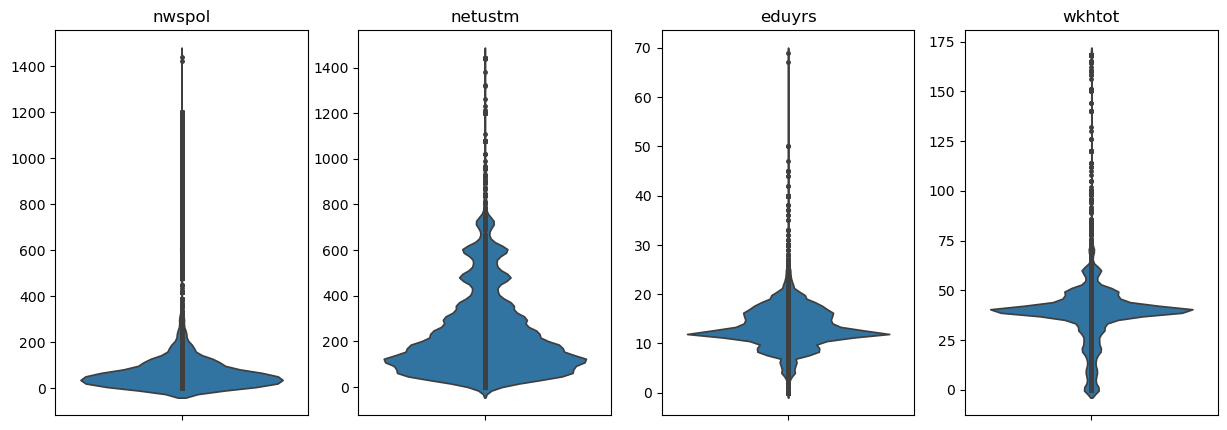

In [14]:
# Violin plots
fig, axes = plt.subplots(nrows=1, ncols=len(df[ilościowe].columns), figsize=(15, 5), sharey=False)
for i, column in enumerate(df[ilościowe].columns):
    sns.violinplot(data=df[ilościowe], y=column, ax=axes[i], inner="point")
    axes[i].set_title(column)
    axes[i].set_ylabel("")
plt.show()

In [15]:
df_median = df.copy()
df_extreme = df.copy()

In [16]:
# Binaryzacja na podstawie częstości - powyżej mediany = 1, reszta = 0
for var in list(df[porządkowe].columns):
    median_value = df[var].median()
    df_median[f'{var}_binary_median'] = np.where(df[var].isna(), np.nan, np.where(df[var] > median_value, 1, 0))

In [17]:
#Binaryzacja podkreślające wartości skrajne
extremes_binary_mapping = {
    "ext_high_edu": ("eisced", [6, 7]),
    "ext_high_edu_partner": ("eiscedp", [6, 7]),
    "ext_high_edu_father": ("eiscedf", [6, 7]),
    "ext_high_edu_mother": ("eiscedm", [6, 7]),
    "ext_worried_climate": ("wrclmch", [4, 5]),
    "ext_religious": ("rlgdgr", [4, 5]),
    "ext_good_health": ("health", [4, 5]),
    "ext_socially_active": ("sclmeet", [6, 7]),
    "ext_happy_or_not": ("happy", [8, 9, 10]),
    "ext_left_wing": ("lrscale", [0, 1, 2]),
    "ext_right_wing": ("lrscale", [8, 9, 10]),
    "ext_centrist": ("lrscale", [3,4,5,6]),
    "ext_someone_close": ("inprdsc", [1, 2, 3, 4, 5, 6])
}

# Tworzenie zmiennych binarnych z zachowaniem NaN
for new_var, (source_var, values) in extremes_binary_mapping.items():
    df_extreme[new_var] = np.where(df[source_var].isna(), np.nan,  # Jeśli NaN → zostaw NaN
                           np.where(df[source_var].isin(values), 1, 0))  # Jeśli wartość pasuje → 1, w przeciwnym razie → 0

#### Sposób mapowania wartości skrajnych
high_edu: eisced,eiscedp,eiscedf,eiscedm - [6,7] - 1  ;

worried_climate: wrclmch - [4/5] - 1;

religious: rlgdgr - [4/5] - 1 ;

good_health: health - [4/5] - 1;

socially_active: sclmeet - [6/7] - 1;

happy_or_not: happy - [8,9,10] - 1;

left_wing: lrscale - [0,1,2] - 1;

right_wing: lrscale - [8,9,10] -1;

someone_close: inprdsc - [1,2,3,4,5,6] - 1;


In [18]:
for var in list(df_extreme.filter(like = 'ext_')):
    print(frequency_table(df_extreme[var]),end = "\n\n===================================\n\n")

              Frequency  Percentage  Cumulative Percentage
ext_high_edu                                              
0.0               29153   73.085312              73.085312
1.0               10736   26.914688             100.000000


                      Frequency  Percentage  Cumulative Percentage
ext_high_edu_partner                                              
0.0                       16438   71.622152              71.622152
1.0                        6513   28.377848             100.000000


                     Frequency  Percentage  Cumulative Percentage
ext_high_edu_father                                              
0.0                      32036   87.279662              87.279662
1.0                       4669   12.720338             100.000000


                     Frequency  Percentage  Cumulative Percentage
ext_high_edu_mother                                              
0.0                      33625   89.162601              89.162601
1.0                       40

In [19]:
for var in list(df_median.filter(like = '_median')):
    print(frequency_table(df_median[var]),end = "\n\n===================================\n\n")

                       Frequency  Percentage  Cumulative Percentage
lrscale_binary_median                                              
0.0                        23096   65.557763              65.557763
1.0                        12134   34.442237             100.000000


                     Frequency  Percentage  Cumulative Percentage
happy_binary_median                                              
0.0                      28654   71.592045              71.592045
1.0                      11370   28.407955             100.000000


                       Frequency  Percentage  Cumulative Percentage
sclmeet_binary_median                                              
0.0                        23688   59.100322              59.100322
1.0                        16393   40.899678             100.000000


                       Frequency  Percentage  Cumulative Percentage
inprdsc_binary_median                                              
0.0                        26270   65.775307      

In [20]:
# Usunięcie surowych wersji kolumn:
df_extreme.drop(columns=porządkowe,inplace=True)
df_median.drop(columns=porządkowe,inplace=True)
df_extreme.drop(columns=['hincsrca'],inplace=True)
df_median.drop(columns=['hincsrca'],inplace=True)

In [21]:
#Zapis przekształconych danych do plików
df.to_csv(r"I:\Mój dysk\Licencjat\Dane\df.csv", index=False)
df_extreme.to_csv(r"I:\Mój dysk\Licencjat\Dane\df_extreme.csv", index=False)
df_median.to_csv(r"I:\Mój dysk\Licencjat\Dane\df_median.csv", index=False)
df_anweight.to_csv(r"I:\Mój dysk\Licencjat\Dane\df_anweight.csv", index=False)

In [22]:
#Podstawowy przegląd zmiennych
df_extreme.filter(like='ext_').describe()

,ext_high_edu,ext_high_edu_partner,ext_high_edu_father,ext_high_edu_mother,ext_worried_climate,ext_religious,ext_good_health,ext_socially_active,ext_happy_or_not,ext_left_wing,ext_right_wing,ext_centrist,ext_someone_close
count,39889.000000,22951.000000,36705.000000,37712.000000,40136.000000,28797.000000,40103.000000,40081.000000,40024.000000,35230.000000,35230.000000,35230.000000,39939.000000
mean,0.269147,0.283778,0.127203,0.108374,0.379335,0.273466,0.680971,0.408997,0.582026,0.127108,0.140988,0.626284,0.954656
std,0.443522,0.450840,0.333205,0.310856,0.485228,0.445746,0.466106,0.491655,0.493232,0.333098,0.348014,0.483796,0.208060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Podstawowy przegląd zmiennych
df_median.filter(like='_median').describe()

,lrscale_binary_median,happy_binary_median,sclmeet_binary_median,inprdsc_binary_median,health_binary_median,rlgdgr_binary_median,wrclmch_binary_median,eisced_binary_median,eiscedp_binary_median,eiscedf_binary_median,eiscedm_binary_median
count,35230.000000,40024.000000,40081.000000,39939.000000,40103.000000,28797.000000,40136.000000,39889.000000,22951.000000,36705.000000,37712.000000
mean,0.344422,0.284080,0.408997,0.342247,0.255093,0.435601,0.392241,0.380957,0.399373,0.333442,0.452508
std,0.475186,0.450981,0.491655,0.474468,0.435919,0.495844,0.488256,0.485628,0.489780,0.471449,0.497746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
for var in list(df_extreme):
    print(frequency_table(df_extreme[var]),end = "\n\n===================================\n\n")

       Frequency  Percentage  Cumulative Percentage
cntry                                              
AT          2354    5.862138               5.862138
BE          1594    3.969519               9.831657
CH          1384    3.446558              13.278215
CY           685    1.705847              14.984062
DE          2420    6.026497              21.010559
ES          1844    4.592091              25.602650
FI          1563    3.892320              29.494970
FR          1771    4.410300              33.905269
GB          1684    4.193645              38.098914
GR          2757    6.865724              44.964638
HR          1563    3.892320              48.856958
HU          2118    5.274430              54.131388
IE          2017    5.022911              59.154298
IS           842    2.096822              61.251121
IT          2865    7.134675              68.385795
LT          1365    3.399243              71.785038
NL          1695    4.221038              76.006076
NO          

In [25]:
df['lrscale'].isnull().sum()

4926

In [26]:
df_extreme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cntry                  40156 non-null  object 
 1   anweight               40156 non-null  float64
 2   nwspol                 39669 non-null  float64
 3   netustm                31397 non-null  float64
 4   rlgblg                 40156 non-null  int64  
 5   ctzcntr                40120 non-null  float64
 6   brncntr                40134 non-null  float64
 7   feethngr               39765 non-null  float64
 8   facntr                 40011 non-null  float64
 9   mocntr                 40090 non-null  float64
 10  gndr                   40156 non-null  object 
 11  dvrcdeva               39954 non-null  float64
 12  chldhhe                40156 non-null  int64  
 13  eduyrs                 39626 non-null  float64
 14  wkhtot                 34688 non-null  float64
 15  pr